In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
  
%matplotlib inline 
import plotly_express as px
import matplotlib.pyplot as mp

In [7]:
df = pd.read_csv(r'EAST_3500_14000_ML_covariates_2208.csv')
df = df.rename(columns={'sampling_r': 'period'})
df = df.rename(columns={'cea_name':'CEA'})
df = df.rename(columns={'property_n':'property_name'})
df = df.rename(columns={'core_120_c':'carbon_core_120'})
df = df.rename(columns={'core_30_carbon_mass':'carbon_core_30'})
df = df.drop(['property_name','esm_layer','strata_nam','period','core_numbe','actual_lat','actual_lon'], axis = 1)
df.head()

,CEA,carbon_core_30,carbon_core_120,v_depth,tpi,slope,s_twi,ogc_6,ogc_5,ogc_4,...,ogc_1,ndvi_stabl,mrvbf,gamma_th_k,gamma_th,gamma_tds,gamma_k,bi,band_12,band_04
0,1,98.202377,148.734636,48.36884,-1.66891,1.79861,8.32761,2881460.25,5472700.5,6597535,...,481865,13507482,0.25540,6.56572,6.12334,34.34082,0.93262,0.00952,0.0414,0.0099
1,2,94.226891,130.342032,4.14072,4.40455,16.65186,4.74041,2881433.75,5473205.0,6598435,...,482415,11063321,0.01326,7.27344,5.53220,30.22344,0.76060,0.01460,0.0463,0.0147
2,1,170.666499,309.640913,32.48051,-4.29474,19.25128,5.43684,2881403.25,5472812.0,6597785,...,482075,16472357,0.01337,6.71676,6.07982,33.83117,0.90517,0.02332,0.0396,0.0239
3,1,136.587510,175.255493,18.76370,2.52118,19.68249,5.10030,2880736.25,5472277.0,6597525,...,482695,16757965,0.00665,8.05307,5.46188,29.07943,0.67824,0.03143,0.0581,0.0323
4,2,116.771895,170.103531,20.84325,4.64223,16.14240,5.54512,2881227.00,5473206.5,6598645,...,482775,14726523,0.05090,7.90545,5.21006,27.98777,0.65905,0.03552,0.0858,0.0333


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    389 non-null    object 
 1   CEA              389 non-null    int64  
 2   strata_nam       389 non-null    int64  
 3   period           389 non-null    object 
 4   core_numbe       389 non-null    int64  
 5   carbon_core_120  389 non-null    float64
 6   topsoil_Cs       389 non-null    float64
 7   subsoil_Cs       389 non-null    float64
 8   slope_pc         389 non-null    float64
 9   s_twi            389 non-null    float64
 10  ogc_6            389 non-null    float64
 11  ogc_5            389 non-null    float64
 12  ogc_4            389 non-null    int64  
 13  ogc_3            389 non-null    float64
 14  ogc_2            389 non-null    float64
 15  ogc_1            389 non-null    float64
 16  ndvi_stabl       389 non-null    float64
 17  mrvbf           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carbon_core_120  389 non-null    float64
 1   topsoil_Cs       389 non-null    float64
 2   subsoil_Cs       389 non-null    float64
 3   slope_pc         389 non-null    float64
 4   s_twi            389 non-null    float64
 5   ogc_6            389 non-null    float64
 6   ogc_5            389 non-null    float64
 7   ogc_4            389 non-null    int64  
 8   ogc_3            389 non-null    float64
 9   ogc_2            389 non-null    float64
 10  ogc_1            389 non-null    float64
 11  ndvi_stabl       389 non-null    float64
 12  mrvbf            389 non-null    float64
 13  gamma_th         389 non-null    float64
 14  gamma_tds        389 non-null    float64
 15  gamma_k          389 non-null    float64
 16  clay_idx         389 non-null    float64
 17  bi              

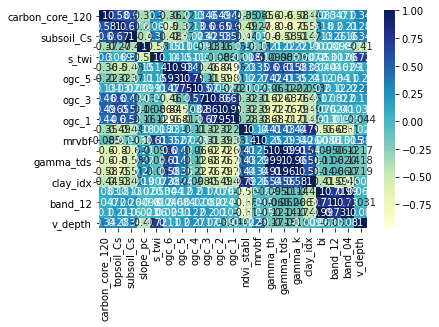

In [4]:
# # plotting correlation heatmap - all CEAS
heatmap_df = df.drop(['core_numbe', 'CEA','strata_nam','period','property_name'],axis = 1)
heatmap_df.info()
dataplot = sns.heatmap(heatmap_df.corr(), cmap="YlGnBu", annot=True)
  
# # displaying heatmap
mp.show()

In [10]:
df.describe()

,CEA,strata_nam,core_numbe,carbon_core_120,topsoil_Cs,subsoil_Cs,slope_pc,s_twi,ogc_6,ogc_5,...,ndvi_stabl,mrvbf,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04,v_depth
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,3.890000e+02,3.890000e+02,...,3.890000e+02,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000
mean,2.920308,3.889460,6131.485861,101.816771,47.956638,41.942666,4.174899,8.131729,3.374230e+06,6.127840e+06,...,8.646912e+06,4.124041,14.959894,64.196806,1.557444,0.154044,0.062276,0.183244,0.078570,15.358081
std,1.266672,2.037184,423.147592,42.369004,16.371116,18.171380,1.903266,1.359968,2.703721e+03,2.096806e+03,...,2.219647e+06,1.914753,10.819098,43.895688,1.098181,0.049151,0.011726,0.032071,0.015784,15.606832
min,1.000000,1.000000,5464.000000,24.694681,17.790700,10.643030,0.179550,5.699690,3.368684e+06,6.122912e+06,...,4.752180e+06,0.133840,2.056410,12.757310,0.163250,0.026930,0.029840,0.096400,0.033600,1.019650
25%,2.000000,2.000000,5776.000000,70.474983,31.783200,25.241160,2.977090,7.046010,3.372082e+06,6.126496e+06,...,6.793668e+06,2.682090,5.891790,23.873820,0.455750,0.117630,0.054160,0.161400,0.067700,4.710300
50%,3.000000,4.000000,6123.000000,98.768325,50.867330,42.084570,4.105740,7.905800,3.374286e+06,6.127806e+06,...,8.224461e+06,3.991340,11.851510,53.140790,1.354240,0.147040,0.062750,0.184400,0.079500,9.486850
75%,4.000000,5.000000,6505.000000,128.177946,58.505900,55.840190,5.478130,9.059090,3.376189e+06,6.129314e+06,...,1.051730e+07,5.123430,22.318780,97.956310,2.650360,0.192930,0.069690,0.204600,0.088600,19.942100
max,5.000000,8.000000,6894.000000,231.715555,125.402730,84.975640,10.037920,12.298240,3.379781e+06,6.132439e+06,...,1.583669e+07,8.913330,44.017980,170.858430,3.734830,0.283380,0.105530,0.271400,0.132400,72.150700


array([[<AxesSubplot:title={'center':'CEA'}>,
        <AxesSubplot:title={'center':'strata_nam'}>,
        <AxesSubplot:title={'center':'core_numbe'}>,
        <AxesSubplot:title={'center':'carbon_core_120'}>,
        <AxesSubplot:title={'center':'topsoil_Cs'}>],
       [<AxesSubplot:title={'center':'subsoil_Cs'}>,
        <AxesSubplot:title={'center':'slope_pc'}>,
        <AxesSubplot:title={'center':'s_twi'}>,
        <AxesSubplot:title={'center':'ogc_6'}>,
        <AxesSubplot:title={'center':'ogc_5'}>],
       [<AxesSubplot:title={'center':'ogc_4'}>,
        <AxesSubplot:title={'center':'ogc_3'}>,
        <AxesSubplot:title={'center':'ogc_2'}>,
        <AxesSubplot:title={'center':'ogc_1'}>,
        <AxesSubplot:title={'center':'ndvi_stabl'}>],
       [<AxesSubplot:title={'center':'mrvbf'}>,
        <AxesSubplot:title={'center':'gamma_th'}>,
        <AxesSubplot:title={'center':'gamma_tds'}>,
        <AxesSubplot:title={'center':'gamma_k'}>,
        <AxesSubplot:title={'center':'cl

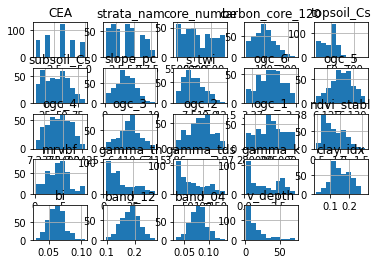

In [11]:
Core_SOC_df = df
Core_SOC_df.hist()

In [ ]:
# Investigating drivers of Core_SOC

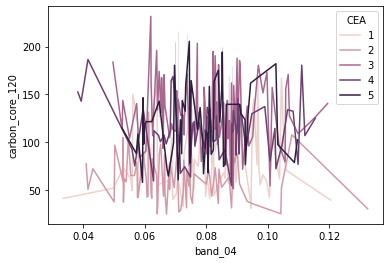

In [12]:
g = sns.lineplot(x ='band_04', y =  'carbon_core_120',  hue = 'CEA', data = Core_SOC_df)

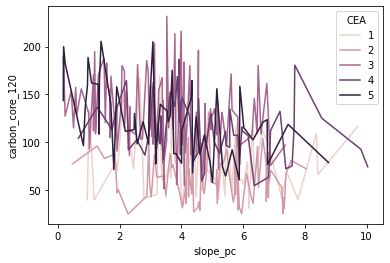

In [13]:
g = sns.lineplot(x ='slope_pc', y =  'carbon_core_120',  hue = 'CEA', data = Core_SOC_df)

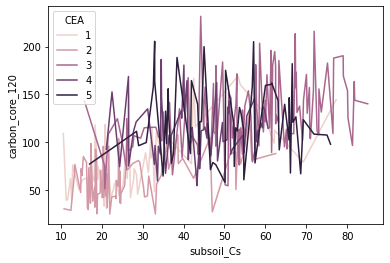

In [14]:
g = sns.lineplot(x ='subsoil_Cs', y =  'carbon_core_120',  hue = 'CEA', data = Core_SOC_df)

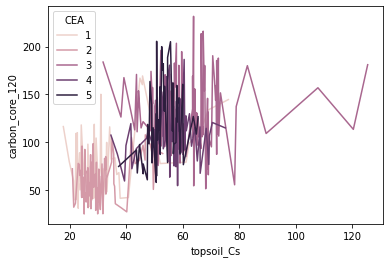

In [15]:
g = sns.lineplot(x ='topsoil_Cs', y =  'carbon_core_120', hue = 'CEA', data = Core_SOC_df)

In [16]:
from pycaret.regression import *

# setup(SOC_percent_df instead of df3 (Core_SOC as target)
# 	R2 from = 0.4959 to 0.5436
exp_reg = setup(Core_SOC_df
,target='carbon_core_120'
#,normalize = True 		# this changes r2 from 0.27 to 0.2625 - ie not at all
,session_id=123 
,log_experiment=True
,experiment_name='BODO_0-120_ML'
#,ignore_features = ['SOC_(%)']
#, transformation = True, transform_target = True	# this changes r2 down
# ,feature_interaction = True  	#feature_ratio = True # creation of new features frome existing # r2 from 0.29 to 0.26
,feature_selection = True 	# this changes r2 from 0.27 to 0.29
, feature_selection_threshold = 0.20
, remove_multicollinearity = True
, multicollinearity_threshold = 0.50
, transform_target = True
# , transformation = True
#, pca = True   			# decrease from 0.29 to 0.1982
)


# try these things
# transformation = True, transform_target = True, 
#                   combine_rare_levels = True, rare_level_threshold = 0.05,
#                   remove_multicollinearity = True, multicollinearity_threshold = 0.95, 

,Description,Value
0,session_id,123
1,Target,carbon_core_120
2,Original Data,"(389, 26)"
3,Missing Values,False
4,Numeric Features,21
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(272, 4)"


In [17]:
compare_models()
# first run of df3 = R2 = 0.48
# ignore features - , ignore_features = ['B04Jun2020'] #,'slope_percent','gamma_u'] R2 = 0.4857
# ,ignore_features = ['B04Jun2020','slope_percent'] #,'gamma_u'] R2 = 0.4857
# ,ignore_features = ['B04Jun2020','slope_percent','gamma_u'] R2 = 0.4857
#, transformation = True, 		R2 from = 0.4857 to 0.4682
# transform_target = True, 		R2 from = 0.4682 to 0.3966
###### transform and transform target don't improve results
# , remove_multicollinearity = True - turn off multicollin	R2 from = 0.4857 to 0.4857
# ,multicollinearity_threshold = 0.95 	R2 from = 0.4857 to 0.4857
# ,multicollinearity_threshold = 0.25	R2 from = 0.4857 to 0.4959
# ,multicollinearity_threshold = 0.05	R2 from = 0.4959 to 0.4959
#,normalize = True, turned off 		R2 from = 0.4959 to 0.4959
# feature_sel_threshold = 0.9 to 0.20	R2 from = 0.4959 to 0.4959

# setup(SOC_percent_df instead of df3 (Core_SOC as target)
# 	R2 from = 0.4959 to 0.5436
# try collinearity threthold - chnaged to 0.5 and see if the model peforms better
# R2 = 0.5441
# try w only 3 input variables 	0.5436
# transform target = True 	R2 from = 0.5436 to 0.5412
# remove outliers 	 	R2 from = 0.5412 0.5365	
# transformation = True 	R2 from = 0.5365 to 	0.5050	
# add CEA and strata name 	R2 from = 0.5050 0.5412




,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,24.6495,981.8223,31.2118,0.3925,0.3301,0.2910,0.0320
ridge,Ridge Regression,25.1167,998.8494,31.5106,0.3820,0.3294,0.2917,0.0070
lr,Linear Regression,25.2201,1009.1408,31.6611,0.3744,0.3307,0.2928,0.4650
lar,Least Angle Regression,25.2201,1009.1406,31.6611,0.3744,0.3307,0.2928,0.0160
huber,Huber Regressor,25.2192,1009.9031,31.6919,0.3730,0.3296,0.2895,0.0130
et,Extra Trees Regressor,25.2989,1020.9314,31.8324,0.3728,0.3340,0.2921,0.0540
rf,Random Forest Regressor,25.1190,1025.3344,31.8436,0.3726,0.3346,0.2908,0.0710
br,Bayesian Ridge,25.3322,1021.3011,31.8694,0.3689,0.3305,0.2933,0.0060
en,Elastic Net,25.4585,1042.5964,32.2067,0.3572,0.3313,0.2944,0.0070
gbr,Gradient Boosting Regressor,25.4550,1061.7364,32.3703,0.3562,0.3387,0.2936,0.0170


PowerTransformedTargetRegressor(base_estimator=None, learning_rate=1.0,
                                loss='linear', n_estimators=50,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=123,
                                regressor=AdaBoostRegressor(base_estimator=None,
                                                            learning_rate=1.0,
                                                            loss='linear',
                                                            n_estimators=50,
                                                            random_state=123))

In [18]:
model = create_model('ada', round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,23.65,822.55,28.68,0.51,0.29,0.28
1,24.84,1032.33,32.13,0.34,0.31,0.25
2,23.94,889.45,29.82,0.26,0.31,0.27
3,25.62,1239.93,35.21,0.42,0.34,0.30
4,27.33,1201.31,34.66,0.49,0.39,0.36
5,18.56,654.35,25.58,0.53,0.26,0.21
6,25.46,936.62,30.60,0.14,0.38,0.34
7,26.00,950.59,30.83,0.55,0.32,0.31
8,28.15,1145.62,33.85,0.28,0.33,0.31
9,22.94,945.48,30.75,0.41,0.37,0.28


In [20]:
tuned_model= tune_model(model, n_iter=300, optimize = 'R2')
# 300 iterations instead of 50 makes no difference

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:48:20
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,AdaBoost Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s


KeyboardInterrupt: 

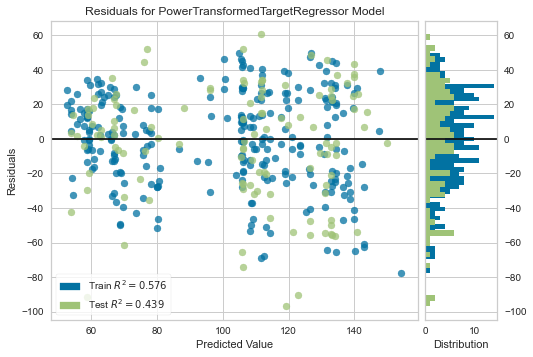

In [21]:
tuned = tuned_model
plot_model(tuned)
# train BODO - 120 = 0.58, test = 0.44

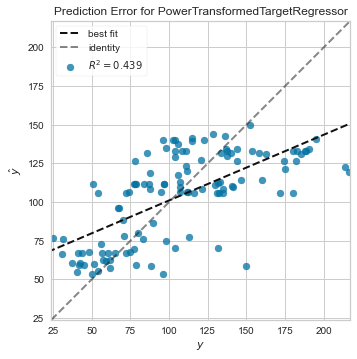

In [22]:
plot_model(tuned, plot = 'error')

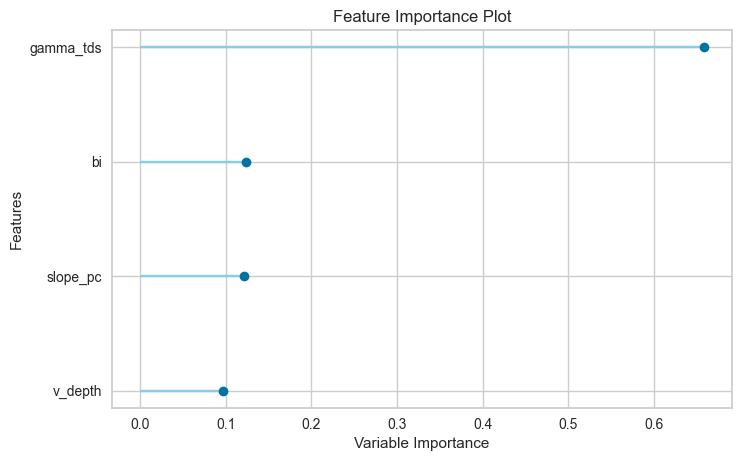

In [23]:
plot_model(tuned, plot = 'feature')

In [24]:
evaluate_model(tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…